In [53]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')


In [55]:
dataset_train.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [56]:
dataset_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [57]:
print("Tamanho dos dados do train antes de remover o ID : {} ".format(dataset_train.shape))
print("Tamanho dos dados do test antes de remover o ID : {} ".format(dataset_test.shape))

#Save the 'Id' column
dataset_train_ID = dataset_train['Id']
dataset_test_ID = dataset_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
dataset_train.drop("Id", axis = 1, inplace = True)
dataset_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nTamanho dos dados do train antes de remover o ID : {} ".format(dataset_train.shape)) 
print("Tamanho dos dados do test antes de remover o ID : {} ".format(dataset_test.shape))

Tamanho dos dados do train antes de remover o ID : (1460, 81) 
Tamanho dos dados do test antes de remover o ID : (1459, 80) 

Tamanho dos dados do train antes de remover o ID : (1460, 80) 
Tamanho dos dados do test antes de remover o ID : (1459, 79) 


In [58]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

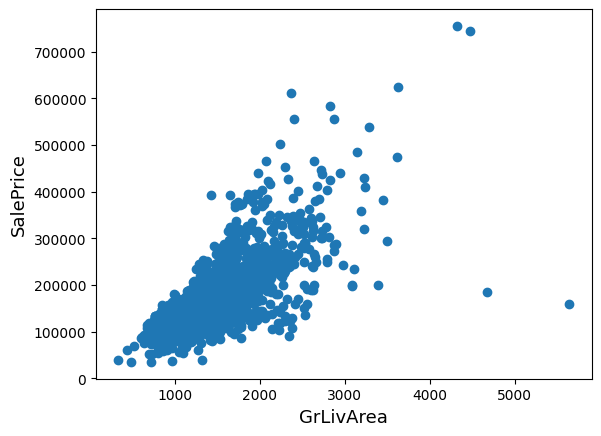

In [63]:
fig, ax = plt.subplots()
ax.scatter(x = dataset_train['GrLivArea'], y = dataset_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#Vemos no canto inferior direito dois com GrLivArea extremamente grandes e com preço baixo. 
#Esses valores são enormes. Portanto, serão excluídos.

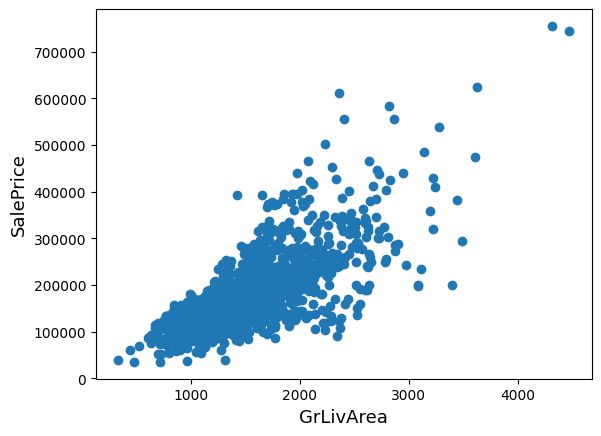

In [67]:
#Deleting outliers
dataset_train = dataset_train.drop(dataset_train[(dataset_train['GrLivArea']>4000) & (dataset_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], dataset_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()